In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import time

X = np.genfromtxt('data/X.csv', delimiter = ',')
Y = np.genfromtxt('data/Y.csv', delimiter = ',')

X = X[1:]
Y = Y[1:]

In [4]:
X[:,:-1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
Y.shape

(99989,)

In [6]:
X_comp, X_test, Y_comp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtr, Xva, Ytr, Yva = train_test_split(X_comp, Y_comp, test_size=0.2)
Xtr, Xva = Xtr[:,:-1], Xva[:,:-1]

Xtr, Ytr = shuffle(Xtr, Ytr)

In [7]:
Xtr.shape

(63992, 219)

In [8]:
Xva.shape

(15999, 219)

In [10]:
lr = LogisticRegression(C=2, penalty='l1')

mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,), activation='identity', 
                            solver='sgd', alpha=0.01, learning_rate='adaptive')

gb = GradientBoostingClassifier(max_depth=3,loss="deviance",learning_rate=0.1,
                                 n_estimators=1500,min_samples_split=20,min_samples_leaf=9,
                                 max_features="sqrt", subsample=0.5)

In [11]:
ensembled_model = VotingClassifier(estimators=[('lr', lr), ('nn', mlp), ('gb', gb)],
                         voting='soft', flatten_transform=True)
sizes = [50, 500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
roc_scores = []
training_errors = []
validation_errors = []
training_scores = []
validation_scores = []

for size in sizes:
    print("training with size of", size)
    ensembled_model.fit(Xtr[:size], Ytr[:size])
    
    roc = roc_auc_score(Yva, ensembled_model.predict_proba(Xva)[:,1])
    training_score = ensembled_model.score(Xtr, Ytr)
    validation_score = ensembled_model.score(Xva, Yva)
    training_error = 1-training_score
    validation_error = 1-validation_score
    print("roc score:", roc, "training_score:", training_score, "validation_score:", validation_score, "training_error:", training_error, "validation_error:", validation_error)
    
    roc_scores.append(roc)
    training_scores.append(training_score)
    validation_scores.append(validation_score)
    training_errors.append(training_error)
    validation_errors.append(validation_error)

training with size of 50


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


roc score: 0.6014817134609278 training_score: 0.5772752844105513 validation_score: 0.5702231389461841 training_error: 0.4227247155894487 validation_error: 0.42977686105381585
training with size of 500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


roc score: 0.6785371009717186 training_score: 0.6352669083635455 validation_score: 0.6306644165260329 training_error: 0.3647330916364545 validation_error: 0.3693355834739671
training with size of 5000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7405522935515687 training_score: 0.684069883735467 validation_score: 0.6765422838927433 training_error: 0.31593011626453305 validation_error: 0.3234577161072567
training with size of 10000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7469784442241709 training_score: 0.689820602575322 validation_score: 0.6791674479654979 training_error: 0.31017939742467804 validation_error: 0.3208325520345021
training with size of 15000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7494635137679425 training_score: 0.6926334541817727 validation_score: 0.6826676667291706 training_error: 0.3073665458182273 validation_error: 0.31733233327082944
training with size of 20000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7512510560883673 training_score: 0.6939617452181522 validation_score: 0.6846052878304894 training_error: 0.30603825478184776 validation_error: 0.31539471216951065
training with size of 25000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7531143628208192 training_score: 0.6958369796224528 validation_score: 0.6832927057941122 training_error: 0.30416302037754717 validation_error: 0.31670729420588783
training with size of 30000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.753898387351557 training_score: 0.6966027003375422 validation_score: 0.6851678229889369 training_error: 0.30339729966245776 validation_error: 0.31483217701106314
training with size of 35000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7553638159821785 training_score: 0.6980091261407676 validation_score: 0.6862928933058317 training_error: 0.3019908738592324 validation_error: 0.31370710669416835
training with size of 40000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.75536043916281 training_score: 0.6974621827728466 validation_score: 0.6869179323707731 training_error: 0.30253781722715345 validation_error: 0.31308206762922686
training with size of 45000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7557097259436815 training_score: 0.6976497062132767 validation_score: 0.6861678854928434 training_error: 0.3023502937867233 validation_error: 0.31383211450715665
training with size of 50000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7558187195265832 training_score: 0.6973684210526315 validation_score: 0.6849803112694544 training_error: 0.3026315789473685 validation_error: 0.31501968873054564


In [13]:
roc_scores

[0.6014817134609278,
 0.6785371009717186,
 0.7405522935515687,
 0.7469784442241709,
 0.7494635137679425,
 0.7512510560883673,
 0.7531143628208192,
 0.753898387351557,
 0.7553638159821785,
 0.75536043916281,
 0.7557097259436815,
 0.7558187195265832]

In [14]:
training_errors

[0.4227247155894487,
 0.3647330916364545,
 0.31593011626453305,
 0.31017939742467804,
 0.3073665458182273,
 0.30603825478184776,
 0.30416302037754717,
 0.30339729966245776,
 0.3019908738592324,
 0.30253781722715345,
 0.3023502937867233,
 0.3026315789473685]

In [15]:
validation_errors

[0.42977686105381585,
 0.3693355834739671,
 0.3234577161072567,
 0.3208325520345021,
 0.31733233327082944,
 0.31539471216951065,
 0.31670729420588783,
 0.31483217701106314,
 0.31370710669416835,
 0.31308206762922686,
 0.31383211450715665,
 0.31501968873054564]

In [16]:
training_scores

[0.5772752844105513,
 0.6352669083635455,
 0.684069883735467,
 0.689820602575322,
 0.6926334541817727,
 0.6939617452181522,
 0.6958369796224528,
 0.6966027003375422,
 0.6980091261407676,
 0.6974621827728466,
 0.6976497062132767,
 0.6973684210526315]

In [17]:
validation_scores

[0.5702231389461841,
 0.6306644165260329,
 0.6765422838927433,
 0.6791674479654979,
 0.6826676667291706,
 0.6846052878304894,
 0.6832927057941122,
 0.6851678229889369,
 0.6862928933058317,
 0.6869179323707731,
 0.6861678854928434,
 0.6849803112694544]

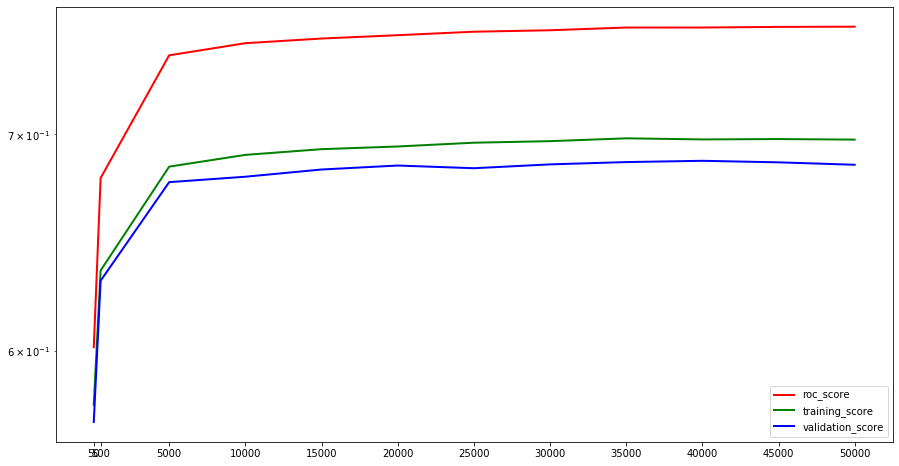

In [18]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(sizes, roc_scores, label='roc_score', linewidth=2, c='r')
plt.semilogy(sizes, training_scores, label='training_score', linewidth=2, c='g')
plt.semilogy(sizes, validation_scores, label='validation_score', linewidth=2, c='b')
plt.xticks(sizes)
plt.legend()
plt.show()

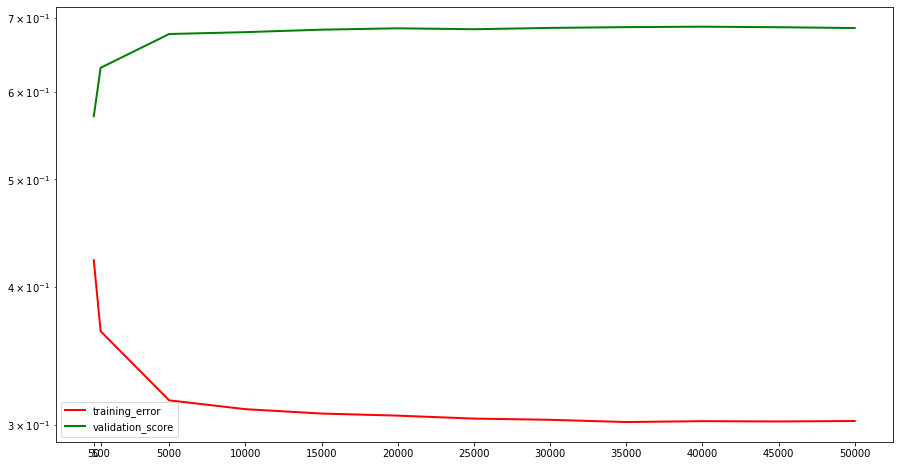

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(sizes, training_errors, label='training_error', linewidth=2, c='r')
plt.semilogy(sizes, validation_scores, label='validation_score', linewidth=2, c='g')
plt.xticks(sizes)
plt.legend()
plt.show()